下载好的dogs-vs-cats里边包含train文件夹和test文件夹，其中train文件夹中的图片是带标签的，train文件夹中一共有25000个文件，一半是猫一半是狗。  
  
训练集太多，现在创建一个新的子集：猫狗两个类别各有1000个训练样本、500个验证样本和500个测试样本。

In [4]:
"""将图像复制到训练、验证和测试的目录"""
import os, shutil

# 原来存放train训练集的地址（这里是我自己的文件夹）
original_dataset_dir = 'D:\\BaiduNetdiskDownload\\DLdata\\dogs-vs-cats\\train\\train'
# 保存新的数据集的目录（也是我自己的）
base_dir = 'D:\\BaiduNetdiskDownload\\DLdata\\dogs-vs-cats\\cats_and_dogs_small'

# 创建主要目录
shutil.rmtree(base_dir, ignore_errors=True)  # 强制删除有文件的目录
os.mkdir(base_dir) 
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir) 
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir) 

# 猫的训练集图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir) 
# 狗的训练图像目录 
train_dogs_dir = os.path.join(train_dir, 'dogs') 
os.mkdir(train_dogs_dir) 

# 猫和狗的验证集图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats') 
os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
os.mkdir(validation_dogs_dir) 

# 猫和狗的测试集图像目录 
test_cats_dir = os.path.join(test_dir, 'cats') 
os.mkdir(test_cats_dir) 
test_dogs_dir = os.path.join(test_dir, 'dogs') 
os.mkdir(test_dogs_dir) 


# 将前1000张猫的图像复制到train_cats_dir，接着500张复制到validation_cats_dir，再500张复制到test_cats_dir，狗同理
# 猫的
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst) 

# 狗的 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst) 

In [5]:
# 构建深度学习卷积神经网络
from keras import layers 
from keras import models 

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
# 配置模型用于训练 
from keras import optimizers 

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [7]:
"""数据预处理，要将jpg的图片转化为float型的张量，步骤如下
1）读取图像文件
2）将JPEG文件解码为RGB像素网格
3）将这些像素网格转换为float类型的张量
4）将像素值（0~255）缩放到[0, 1]区间（标准化）
"""
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'  # 因为使用了binary_crossentropy损失，所以需要用二进制标签
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# 利用批量生成器拟合模型
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=50
)

# 保存模型
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 63s 619ms/step - loss: 0.6983 - acc: 0.5303 - val_loss: 0.6880 - val_acc: 0.5210
Epoch 2/30
100/100 [==============================] - 93s 929ms/step - loss: 0.6725 - acc: 0.5933 - val_loss: 0.6498 - val_acc: 0.6440
Epoch 3/30
100/100 [==============================] - 89s 888ms/step - loss: 0.6216 - acc: 0.6694 - val_loss: 0.6934 - val_acc: 0.5730
Epoch 4/30
100/100 [==============================] - 83s 828ms/step - loss: 0.5885 - acc: 0.6979 - val_loss: 0.5933 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 80s 803ms/step - loss: 0.5254 - acc: 0.7550 - val_loss: 0.5713 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 81s 811ms/step - loss: 0.5146 - acc: 0.7579 - val_loss: 0.5659 - val_acc: 0.7100
Epoch 7/30
100/100 [==============================] - 83s 834ms/step - loss: 0.4822 - acc: 0.7560 - val_loss: 0.5529 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 8

In [9]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and Validation accuracy') 
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validaion loss') 
plt.title('Training and validation loss') 
plt.legend() 

plt.show() 


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

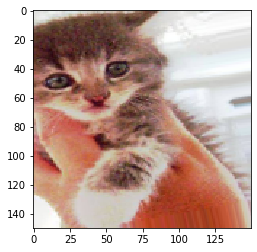

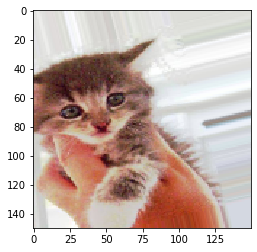

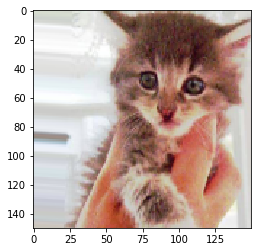

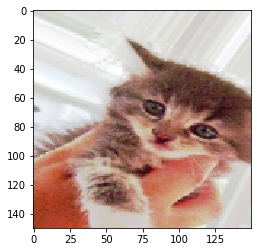

In [10]:
"""从上面的两张图可以明显看出过拟合了，主要原因是训练样本相对较少
   下面利用ImageDataGenerator来设置数据增强来‘增加’训练样本
"""
datagen = ImageDataGenerator(
    rotation_range=40,       # 图像随机旋转0~40度（最大80度）
    width_shift_range=0.2,   # 水平方向上平移
    height_shift_range=0.2,  # 垂直方向上平移
    shear_range=0.2,         # 随机错切变换的角度
    zoom_range=0.2,          # 图像随机缩放的范围
    horizontal_flip=True,    # 随机将一半图像水平翻转
    fill_mode='nearest'      # 用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度/高度平移
)

# 显示几个随机增强后的训练图像
from keras.preprocessing import image 

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]  # 选择一张图进行增强
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)  # 将其转换为形状（150， 150， 3）的numpy数组
x = x.reshape((1, ) + x.shape)  # 将其形状改变为（1，150，150，3）

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i) 
    i += 1
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    if i % 4 == 0:
        break 
plt.show() 

In [11]:
# 定义一个包含dropout层的新卷积神经网络，dropout层能有效避免过拟合 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [12]:
# 利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

history = model.fit_generator(  
    # 这里有时候会报错，把几个epoch调低点就可以了，我也不懂为啥，尽量不要与原来的差太多
    train_generator, 
    steps_per_epoch=50, 
    epochs=100, 
    validation_data=validation_generator, 
    validation_steps=10
)

# 保存模型
model.save('cats_and_dogs_small_2.h5') 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
50/50 [==============================] - 44s 873ms/step - loss: 0.7012 - acc: 0.4747 - val_loss: 0.6890 - val_acc: 0.5406
Epoch 2/100
50/50 [==============================] - 43s 859ms/step - loss: 0.6901 - acc: 0.5578 - val_loss: 0.6815 - val_acc: 0.5813
Epoch 3/100
50/50 [==============================] - 43s 855ms/step - loss: 0.6832 - acc: 0.5656 - val_loss: 0.6669 - val_acc: 0.5719
Epoch 4/100
50/50 [==============================] - 43s 857ms/step - loss: 0.6743 - acc: 0.5977 - val_loss: 0.6427 - val_acc: 0.6219
Epoch 5/100
50/50 [==============================] - 43s 863ms/step - loss: 0.6612 - acc: 0.6154 - val_loss: 0.6728 - val_acc: 0.5469
Epoch 6/100
50/50 [==============================] - 43s 862ms/step - loss: 0.6539 - acc: 0.6162 - val_loss: 0.6238 - val_acc: 0.6281
Epoch 7/100
50/50 [==============================] - 43s 856ms/step - loss: 0.6576 - acc: 0.6122 - val_loss: 0.6

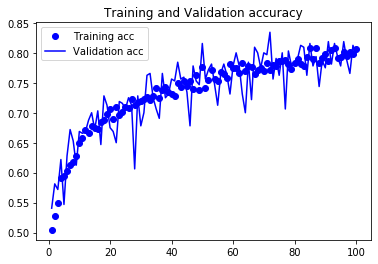

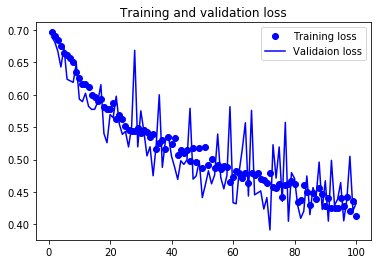

In [13]:
# 绘制新的训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and Validation accuracy') 
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validaion loss') 
plt.title('Training and validation loss') 
plt.legend() 

plt.show() 

In [14]:
f1 = r'D:\BaiduNetdiskDownload\DLdata\dogs-vs-cats\test\test\2.jpg'  # 狗
f2 = r'D:\BaiduNetdiskDownload\DLdata\dogs-vs-cats\test\test\7.jpg'  # cat

img_path = f1
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)  # 将其转换为形状（150， 150， 3）的numpy数组
x = x.astype('float32') / 255
x = x.reshape((1, ) + x.shape)  # 转化为(1, 150, 150, 3)

res = model.predict(x)  # 接近0就是猫，接近1就是狗，这里用的f1是狗，f2是猫
res[0][0]

0.9875314

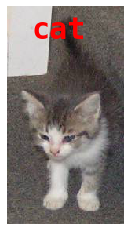

In [15]:
# 测试一下，识别当前目录下的test.jpg文件
import matplotlib.pyplot as plt 
from keras.preprocessing import image 
from keras.models import load_model

model = load_model('./cats_and_dogs_small_2.h5')
image_path = r'./test_data/35.jpg'  # 这里是要被测试的的图片文件地址
original_image = image.load_img(image_path)

img = image.load_img(image_path, target_size=(150, 150))
x = image.img_to_array(img) 
x = x.astype('float32') / 255 
x = x.reshape((1, ) + x.shape) 

res = model.predict(x)
res = res[0][0]

text = 'cat'
if res > 0.5:
    text = 'dog'
plt.imshow(original_image)
plt.axis("off")
plt.text(30, 40, text, fontdict=dict(fontsize=30, color='r',
            family='monospace',#字体,可选'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
            weight='bold',#磅值，可选'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
            )#字体属性设置
)
plt.show()